<a href="https://colab.research.google.com/github/hhboorstein/ds_portfolio/blob/main/Energy_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

palette=sns.color_palette()
sns.set_theme()

In [52]:
df=pd.read_csv('DUQ_hourly.csv',
               index_col='Datetime',
               parse_dates=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


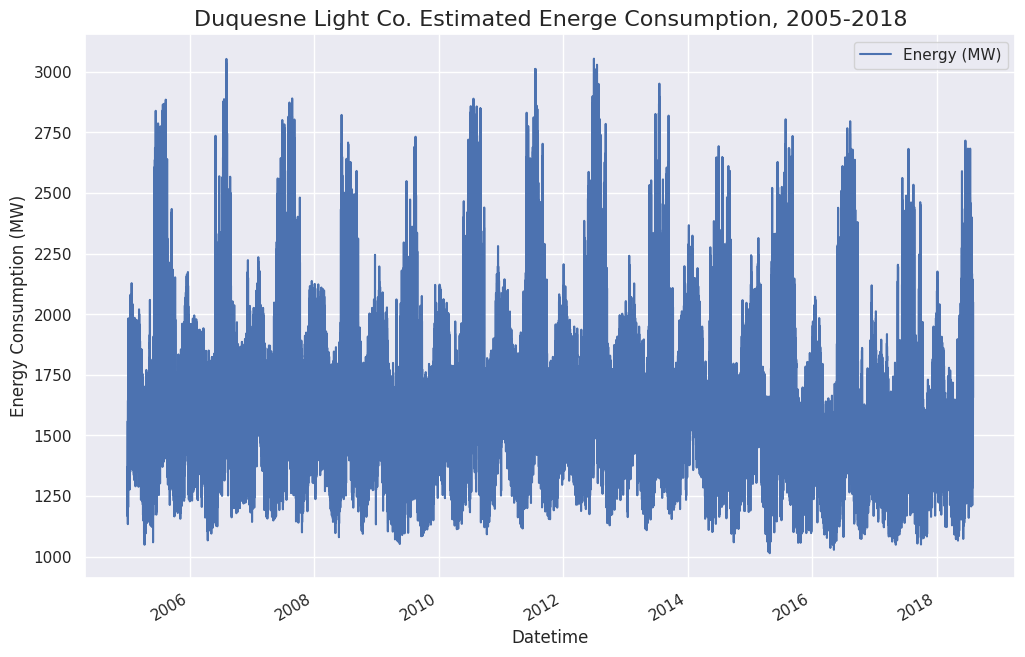

In [37]:
fig,ax=plt.subplots(figsize=(12,8))
plt.title('Duquesne Light Co. Estimated Energe Consumption, 2005-2018',fontsize=16)
df.plot(ax=ax)
plt.ylabel('Energy Consumption (MW)')
plt.legend(['Energy (MW)']);

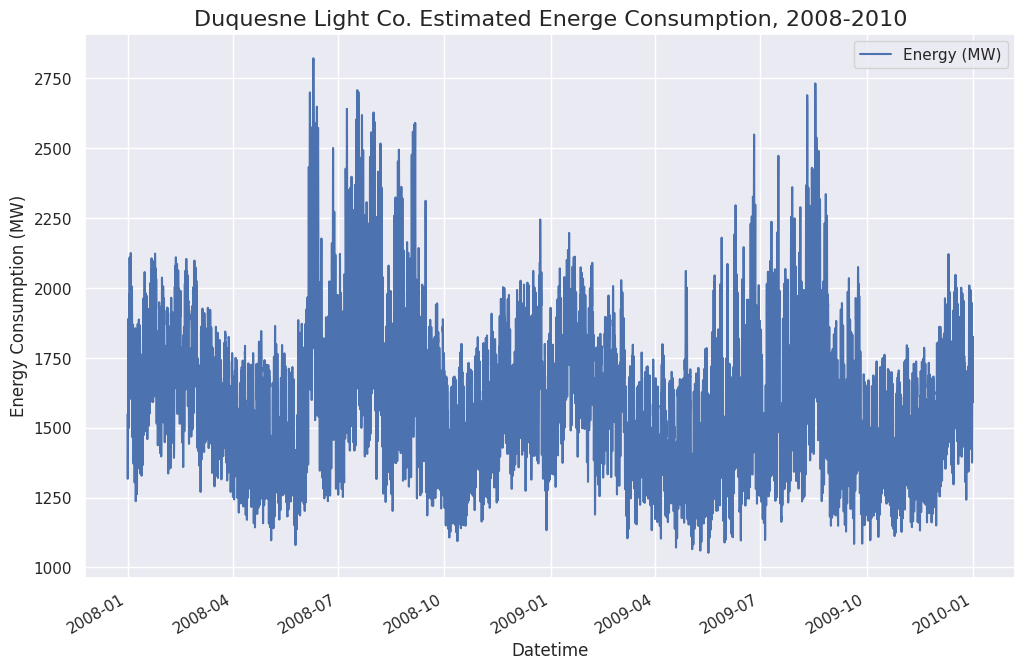

In [38]:
fig,ax=plt.subplots(figsize=(12,8))
plt.title('Duquesne Light Co. Estimated Energe Consumption, 2008-2010',fontsize=16)
df.loc[(df.index<'1-1-2010') & (df.index>='1-1-2008')].plot(ax=ax)
plt.ylabel('Energy Consumption (MW)')
plt.legend(['Energy (MW)']);

In [39]:
import prophet

In [41]:
train=df.loc[df.index<'1-1-2016']
test=df.loc[df.index>='1-1-2016']

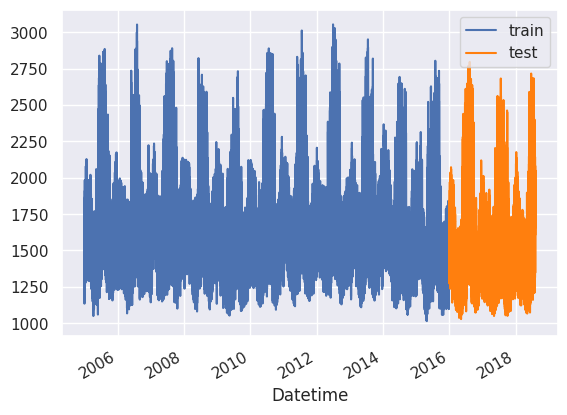

In [45]:
_,ax=plt.subplots()
train.plot(ax=ax)
test.plot(ax=ax,c=palette[1])
plt.legend(['train','test'])

In [56]:
prophet_train=train.reset_index().rename(columns={'Datetime':'ds','DUQ_MW':'y'})

In [82]:
p=prophet.Prophet()
p.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zbqp_kb/zhf5orsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zbqp_kb/kyl4x75k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77123', 'data', 'file=/tmp/tmp3zbqp_kb/zhf5orsk.json', 'init=/tmp/tmp3zbqp_kb/kyl4x75k.json', 'output', 'file=/tmp/tmp3zbqp_kb/prophet_modelh577ge8_/prophet_model-20240116034527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:45:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
prophet_test=test.reset_index().rename(columns={'Datetime':'ds','DUQ_MW':'y'})

In [84]:
forecast=p.predict(prophet_test)

<Axes: xlabel='ds'>

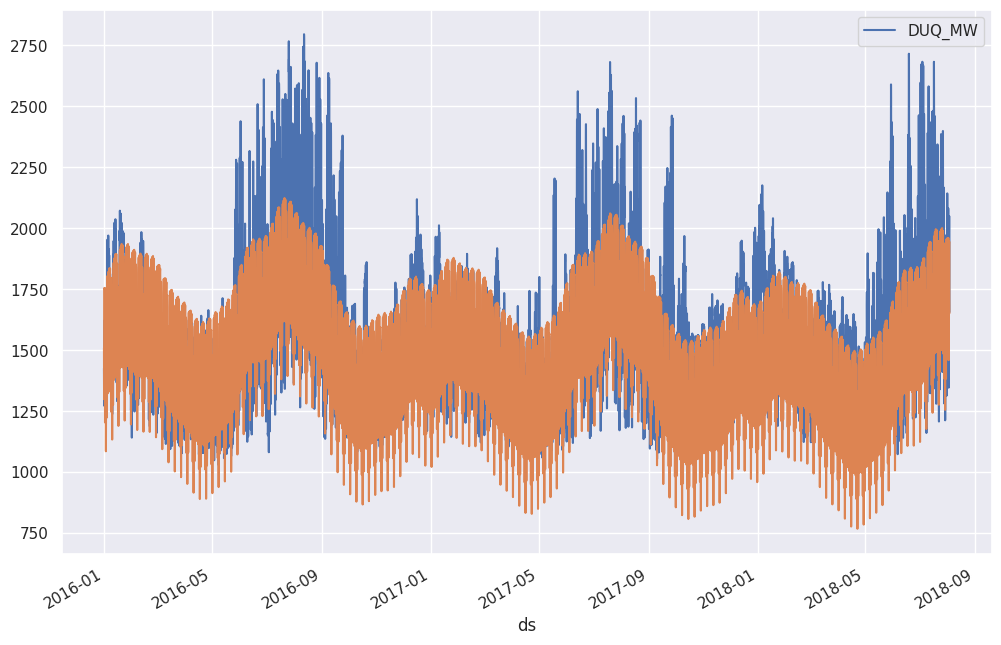

In [69]:
_,ax=plt.subplots(figsize=(12,8))
test.plot(ax=ax)
forecast['yhat'].plot(ax=ax)

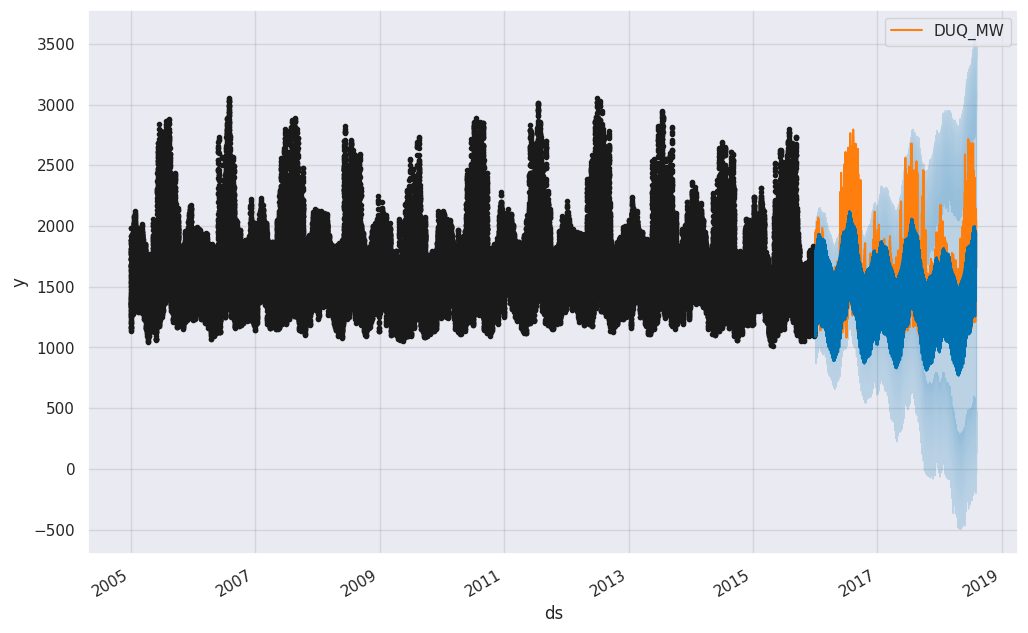

In [86]:
_,ax=plt.subplots(figsize=(12,8))
test.plot(ax=ax,color=palette[1])
p.plot(forecast,ax=ax);

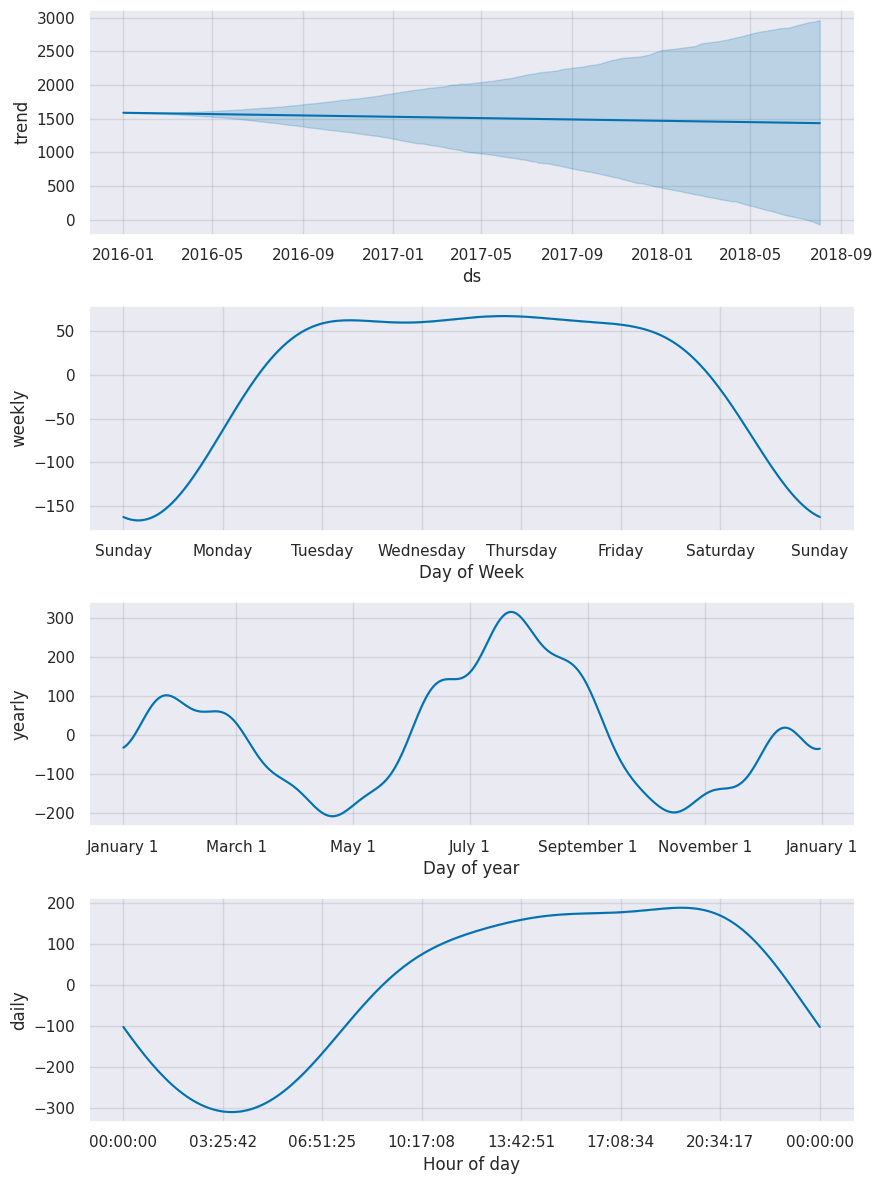

In [87]:
p.plot_components(forecast);

In [80]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01 00:00:00,1587.411121,1289.872403,1709.200353,1587.411121,1587.411121,-79.404115,-79.404115,-79.404115,-102.704821,...,57.072075,57.072075,57.072075,-33.771369,-33.771369,-33.771369,0.0,0.0,0.0,1508.007006
1,2016-01-01 01:00:00,1587.404299,1208.570563,1637.622988,1587.404299,1587.404299,-171.543092,-171.543092,-171.543092,-194.292211,...,56.436864,56.436864,56.436864,-33.687744,-33.687744,-33.687744,0.0,0.0,0.0,1415.861208
2,2016-01-01 02:00:00,1587.397477,1129.266689,1559.934477,1587.397477,1587.397477,-240.691261,-240.691261,-240.691261,-262.793208,...,55.704201,55.704201,55.704201,-33.602253,-33.602253,-33.602253,0.0,0.0,0.0,1346.706216
3,2016-01-01 03:00:00,1587.390655,1105.440848,1524.564908,1587.390655,1587.390655,-280.398922,-280.398922,-280.398922,-301.740829,...,54.856803,54.856803,54.856803,-33.514896,-33.514896,-33.514896,0.0,0.0,0.0,1306.991733
4,2016-01-01 04:00:00,1587.383833,1081.818916,1512.757601,1587.383833,1587.383833,-288.730027,-288.730027,-288.730027,-309.181109,...,53.876755,53.876755,53.876755,-33.425673,-33.425673,-33.425673,0.0,0.0,0.0,1298.653805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22675,2018-08-02 20:00:00,1432.713026,538.241389,3412.151695,15.511093,2872.970023,506.742825,506.742825,506.742825,182.370554,...,58.951510,58.951510,58.951510,265.420762,265.420762,265.420762,0.0,0.0,0.0,1939.455852
22676,2018-08-02 21:00:00,1432.706204,439.222654,3367.968389,15.366671,2873.126313,475.537975,475.537975,475.537975,151.859624,...,58.552356,58.552356,58.552356,265.125995,265.125995,265.125995,0.0,0.0,0.0,1908.244179
22677,2018-08-02 22:00:00,1432.699382,472.561048,3309.789409,15.222249,2873.282603,411.428325,411.428325,411.428325,88.482067,...,58.114950,58.114950,58.114950,264.831308,264.831308,264.831308,0.0,0.0,0.0,1844.127708
22678,2018-08-02 23:00:00,1432.692560,317.263981,3260.508485,15.077827,2873.438893,320.174408,320.174408,320.174408,-1.988590,...,57.626287,57.626287,57.626287,264.536711,264.536711,264.536711,0.0,0.0,0.0,1752.866968
